In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Decision Boundary

In [45]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
print(X.shape,y)

(6, 2) [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [46]:
def plot_data(x,y,ax):
    for i in range(x.shape[0]):
        # ax.axis([0, 4, 0, 3.5])
        x0,x1 = x[i]
        if y[i] == 0:
            ax.scatter(x0,x1,marker='o',c='b')
        else:
            ax.scatter(x0,x1,marker='x',c='r')

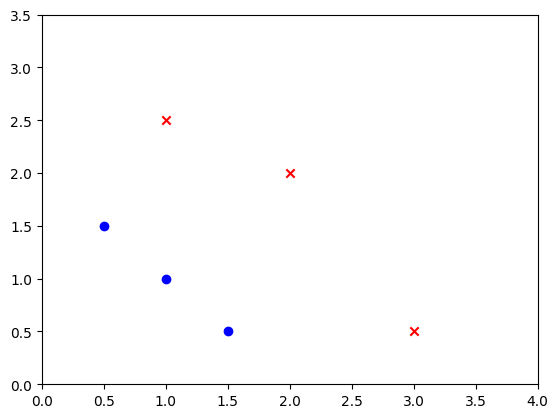

In [47]:
fig,ax = plt.subplots(1,1)
plot_data(X,y,ax)
ax.axis([0, 4, 0, 3.5])
plt.show()

$f_{w,b}(\overrightarrow {x}^{(i)})$

In [48]:
w = 1
b = -3
x0 = np.arange(0,6)
# x1 = w*-x0 -b or,
x1 = -b - x0

print(x0,x1)

[0 1 2 3 4 5] [ 3  2  1  0 -1 -2]


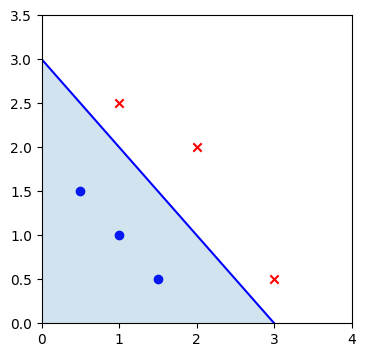

In [49]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x0,x1,c='b')
plot_data(X,y,ax)
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0,x1, alpha=0.2)
plt.show()

In [50]:
print(X,y)
print(X.shape,y.shape)

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]
(6, 2) (6, 1)


In [51]:
def logistic(x,w,b):
    g = np.zeros(x.shape[0])
    for i in range(x.shape[m]):
        z = np.dot(w,x) + b
        g[i] = 1/(1 + np.exp(-z))
    return g

In [52]:
def sigmoid(w,x,b):
    z = np.dot(w,x) + b
    g_z = 1/(1+np.exp(-z))
    return g_z

In [53]:
def gradient(w,x,y,b):
    m,n = x.shape
    dw = np.zeros(n)
    db = 0.
    for i in range(m):
        f_x = sigmoid(w,x[i],b)
        error = f_x - y[i]
        for j in range(n):
            dw[j] = dw[j]+error*x[i][j]
        db = db+error
    return dw/m,db/m

In [54]:
dw,db = gradient([2.,3.],X,y,1.)
print(dw,db)

[0.49833339 0.49883943] [0.49861807]


C:\Users\rudkhan\AppData\Local\Temp\ipykernel_39768\2339006001.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dw[j] = dw[j]+error*x[i][j]


In [55]:
def gradient_descent(itr,x,y,alpha):
    m,n = x.shape
    w = np.zeros(n)
    b = 0.
    for i in range(itr):
        dw,db = gradient(w,x,y,b)
        w = w - alpha*dw
        b = b - alpha*db
        if int(i%1000) == 0:
            print(w,b)
    return w,b

In [60]:
w,b = gradient_descent(10000,X,y,1.0e-1)

C:\Users\rudkhan\AppData\Local\Temp\ipykernel_39768\2339006001.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dw[j] = dw[j]+error*x[i][j]


[0.025      0.01666667] [0.]
[2.30572624 2.07740353] [-5.9109933]
[3.15508984 2.94023038] [-8.31149229]
[3.68092411 3.47097047] [-9.78230424]
[4.06024975 3.8527842 ] [-10.83864078]
[4.35647898 4.15050189] [-11.66153789]
[4.59929949 4.39430614] [-12.33499996]
[4.80494417 4.6006459 ] [-12.90472026]
[4.98324047 4.77945746] [-13.39826588]
[5.14058319 4.93719618] [-13.83353047]


In [57]:
def predict(w,b,x):
    z = np.dot(w,x) + b
    g = 1/(1+np.exp(-z))
    return g

In [58]:
prediction = predict(w,b,[3, 0.5])
prediction

array([0.98463772])

In [26]:
import pandas as pd

data = {"a":[1,np.nan,np.nan,2,4],"b":np.array([1,2,3,4,5])}
data1 = {"c":[0.1,0.4,1.9]}
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data1)
df1.fillna(0.)

,a,b
0,1.0,1
1,0.0,2
2,0.0,3
3,2.0,4
4,4.0,5


In [27]:
df2

,c
0,0.1
1,0.4
2,1.9


In [37]:
resdf = pd.concat([df1,df2],axis=1)

In [59]:
df3 = pd.DataFrame({
    "d-merge":[1,2,5]
})
df3.merge(df1,how='right',left_on='d-merge',right_on='b')

,d-merge,a,b
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,3
3,NaN,2.0,4
4,5.0,4.0,5
